In [101]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import time
import datetime as dt
from IPython.display import HTML, display
import math

seaborn.set_context('talk')

#Filtrado Bianca

In [102]:
url= 'https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/DiploDatos_Mentoria_Mumiki_G2/DataSet_Mumuki_Transformed.csv'
df_mumuki = pd.read_csv(url)
df_mumuki=df_mumuki.drop(columns='Unnamed: 0',axis=1)

In [103]:
len(df_mumuki)

47099

In [104]:
df_mumuki['created_at'] = df_mumuki['submission_created_at']
df_student = df_mumuki.groupby(['student_uid'], as_index=True).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),'submission_created_at':'min','created_at':'max'}).rename(columns={'id_exercise':'cant_envios','exercise_name':'cant_ejercicios_unicos','submission_created_at':'f_primer_envio','created_at':'f_ultimo_envio'})
df_student['tiempo_invertido'] = pd.to_datetime(df_student['f_ultimo_envio'])-pd.to_datetime(df_student['f_primer_envio'])
df_student['tiempo_invertido_horas'] = round((pd.to_datetime(df_student['f_ultimo_envio'])-pd.to_datetime(df_student['f_primer_envio'])).dt.total_seconds() / 3600.0,2) 
df_student['tiempo_invertido_dias'] = round(df_student['tiempo_invertido_horas']/24,4)

#eliminacion
df_student = df_student[df_student['tiempo_invertido_dias']<=100]


es el user con student_uid: 97

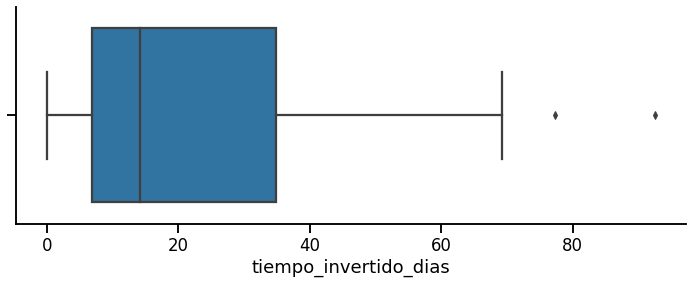

In [105]:
#checkeo
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_student['tiempo_invertido_dias'])
seaborn.despine()

#Filtrado Lara

In [106]:
df_envios=df_mumuki.groupby(['student_uid'], as_index=False).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),}).rename(columns={'id_exercise':'Cant_Envios','exercise_name':'Ejercicios_ Resueltos', "student_uid": 'UID del estudiante'})
df_envios

,UID del estudiante,Cant_Envios,Ejercicios_ Resueltos
0,75,1,1
1,76,89,36
2,77,186,40
3,78,84,9
4,79,95,22
...,...,...,...
280,358,6,1
281,359,38,16
282,361,1,1
283,362,3,1


In [107]:
df_envios.describe()

,UID del estudiante,Cant_Envios,Ejercicios_ Resueltos
count,285.000000,285.000000,285.000000
mean,217.066667,165.259649,31.161404
std,82.531593,108.395741,13.409133
min,75.000000,1.000000,1.000000
25%,146.000000,86.000000,22.000000
50%,217.000000,149.000000,40.000000
75%,288.000000,223.000000,40.000000
max,363.000000,660.000000,40.000000


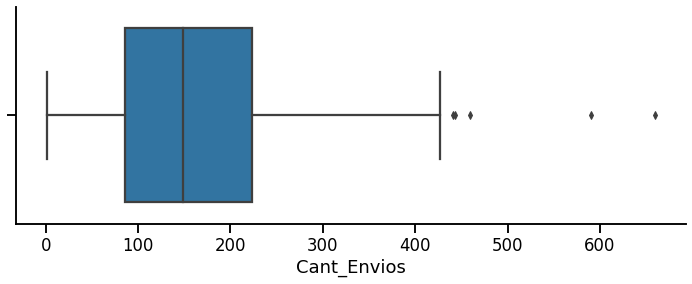

In [108]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_envios['Cant_Envios'])
seaborn.despine()

In [109]:
interesting_range_envios = df_envios['Cant_Envios'].quantile([.02, .97])
min = interesting_range_envios.values[0]
max = interesting_range_envios.values[1]
df_envios_2 = df_envios[df_envios['Cant_Envios'].between(min, max)]

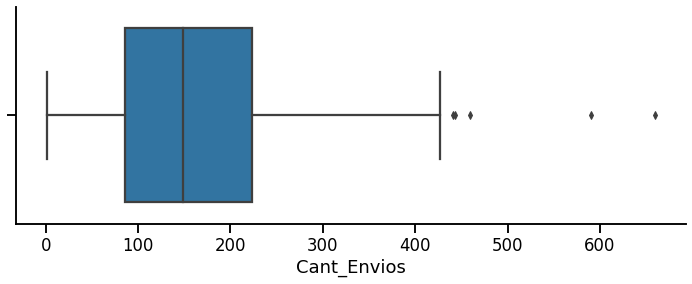

In [110]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_envios['Cant_Envios'])
seaborn.despine()

#Juntar en el dataframe original

###Eliminacion outlier fechas - bianca

In [111]:
len(df_mumuki['student_uid'].value_counts())

285

In [112]:
len(df_mumuki)

47099

In [113]:
df_mumuki=df_mumuki[df_mumuki['student_uid']!=97]

In [114]:
len(df_mumuki['student_uid'].value_counts())

284

In [115]:
len(df_mumuki)

46998

In [116]:
df_student_despues_fechas = df_mumuki.groupby(['student_uid'], as_index=True).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),'submission_created_at':'min','created_at':'max'}).rename(columns={'id_exercise':'cant_envios','exercise_name':'cant_ejercicios_unicos','submission_created_at':'f_primer_envio','created_at':'f_ultimo_envio'})
df_student_despues_fechas['tiempo_invertido'] = pd.to_datetime(df_student_despues_fechas['f_ultimo_envio'])-pd.to_datetime(df_student_despues_fechas['f_primer_envio'])
df_student_despues_fechas['tiempo_invertido_horas'] = round((pd.to_datetime(df_student_despues_fechas['f_ultimo_envio'])-pd.to_datetime(df_student_despues_fechas['f_primer_envio'])).dt.total_seconds() / 3600.0,2) 
df_student_despues_fechas['tiempo_invertido_dias'] = round(df_student_despues_fechas['tiempo_invertido_horas']/24,4)

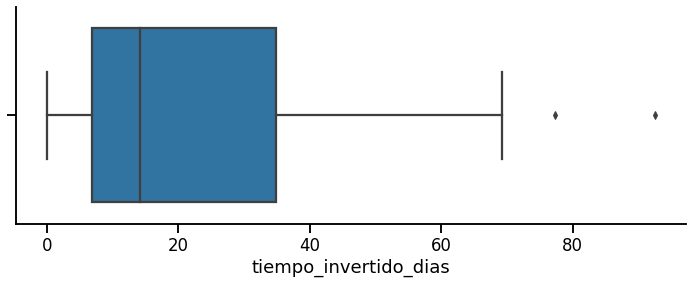

In [117]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_student_despues_fechas['tiempo_invertido_dias'])
seaborn.despine()

###Eliminacion outliers envios - Lara

In [118]:
# id de students con un solo envío
std_un_solo_envio= df_envios[df_envios['Cant_Envios']==1]['UID del estudiante'].to_list()
std_un_solo_envio

[75, 142, 361]

In [119]:
# id de students con cantidad de envios mayor al percentil 0.97
std_envios_97_percentil= df_envios[df_envios['Cant_Envios']>max]['UID del estudiante'].to_list() 
std_envios_97_percentil

[147, 157, 179, 191, 231, 256, 265, 283, 301]

In [120]:
filtered_uids_stds=std_un_solo_envio+std_envios_97_percentil

In [126]:
len(df_mumuki[~df_mumuki['student_uid'].isin(filtered_uids_stds)])

42785

In [125]:
len(df_mumuki[~df_mumuki['student_uid'].isin(filtered_uids_stds)])/len(df_mumuki)

0.9103578875696838

In [122]:
len(df_mumuki[df_mumuki['student_uid'].isin(filtered_uids_stds)])

4213

In [127]:
#eliminacion
df_mumuki=df_mumuki[~df_mumuki['student_uid'].isin(filtered_uids_stds)]

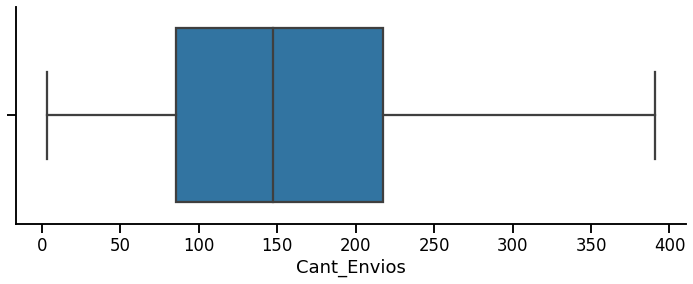

In [128]:
#validacion
df_envios_sin_otl=df_mumuki.groupby(['student_uid'], as_index=False).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),}).rename(columns={'id_exercise':'Cant_Envios','exercise_name':'Ejercicios_ Resueltos', "student_uid": 'UID del estudiante'})
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_envios_sin_otl['Cant_Envios'])
seaborn.despine()

#### Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas.

In [129]:
df_mumuki.to_csv('DataSet_Mumuki_Outliers.csv')